## **Algorithmic Detection of Credit Card Defaulting**
#### **Final Project Phase 3**
*Tanvi Namjoshi, Dylan Van Bramer, Madeline Demers, Ella White*

In this report, we perform an initial examination of the dataset obtained from UC Irvine in 2016, focusing on credit card clients in Taiwan who have defaulted. Building a predictive model to assess the likelihood of customer defaulting requires fairness to prevent discrimination based on sensitive features. Defaulting on a credit card is defined as failing to make the minimum payment for at least 180 days. We plan to explore whether we can find a risk prediction model that is fair across different subgroups (male/female, education) that still remains accurate. 

The original source for the data can be found here: [https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

### **Introduction**

##### **A) What are your research questions?** 


##### **B) Why is this an interesting research question? How does it relate to algorithmic fairness?** 

##### **C) What related work has been done in this space?**

TODO: add introduction

### **Datasheet for Dataset**

TODO: add Datashet

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, RocCurveDisplay,roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### **Data Import and Cleaning**

To clean the data we first checked for any missing values in the CSV file. However, no missing values were found. For the features SEX, EDUCATION, and MARRIAGE asserted that all the info provided by the dataset creators is accurate by asserting that each value was in the correct range. We removed any rows that did not meet the expectations documented by the dataset creators. This led to 399 bad rows of data (out of 30,000) being removed. Finally, we changed the format of the SEX, EDUCATION, and MARRIAGE features to be one-hot encodings giving us the following new columns: sex_male,	sex_female,	graduate_education,	university_education,	highschool_education,	other_education,	married,	single,	marriage_other.

In [92]:
clean_df = pd.read_csv('cleaned_data.csv',)
#display(clean_df.head())

#### **Data Summary Statistics**


In [93]:
def get_group_idx(df):
  female_idx = df.index[df["sex_female"]==1]
  male_idx = df.index[df["sex_male"] == 1]
  graduate_idx = df.index[df["graduate_education"]==1]
  university_idx = df.index[df["university_education"] == 1]
  highschool_idx = df.index[df["highschool_education"] == 1]
  other_education_idx = df.index[df["other_education"] == 1]
  married_idx = df.index[df["married"]==1]
  single_idx = df.index[df["single"]==1]
  marriage_other_idx = df.index[df["marriage_other"]==1]
  under_fifty_idx = df.index[df["AGE"]<50]
  over_fifty_idx = df.index[df["AGE"] >= 50]

  return (female_idx, male_idx, graduate_idx, university_idx, highschool_idx, other_education_idx, married_idx, single_idx,marriage_other_idx,under_fifty_idx,over_fifty_idx)


In [94]:
# Part 2 (a)
rows = clean_df.count()[0]
columns = len(clean_df.columns)
print("Looking at the whole dataset:")
print("There are", rows, "rows of data in the dataframe")
print("There are", columns, "features/columns in the dataframe")


#Per sensitive attribute subgroup
(female_idx, male_idx, graduate_idx, university_idx, highschool_idx, other_education_idx, married_idx, single_idx,marriage_other_idx,under_fifty_idx,over_fifty_idx) = get_group_idx(clean_df)

#Gender 
print("\nLooking at the dataset by gender:")
print("The number of data points where the person's gender is female is: ", len(female_idx))
print("The number of data points where the person's gender is male is: ", len(male_idx))

#Education 
print("\nLooking at the dataset by education:")
print("The number of data points where the person has a graduate education is: ", len(graduate_idx))
print("The number of data points where the person has a univeristy education is: ", len(university_idx))
print("The number of data points where the person has a high school education is: ", len(highschool_idx))
print("The number of data points where the person has none of the above is: ", len(other_education_idx))

# Marriage Status
print("\nLooking at the dataset by marriage status:")
print("The number of data points where the person is married is: ", len(married_idx))
print("The number of data points where the person is single: ", len(single_idx))
print("The number of data points where the person identifies as neither married or single: ", len(marriage_other_idx))

#AGE 
print("\nLooking at the dataset by AGE:")
print("The number of data points where the person is under 50: ", len(under_fifty_idx))
print("The number of data points where the person is over 50: ", len(over_fifty_idx))

Looking at the whole dataset:
There are 29601 rows of data in the dataframe
There are 30 features/columns in the dataframe

Looking at the dataset by gender:
The number of data points where the person's gender is female is:  17855
The number of data points where the person's gender is male is:  11746

Looking at the dataset by education:
The number of data points where the person has a graduate education is:  10581
The number of data points where the person has a univeristy education is:  14024
The number of data points where the person has a high school education is:  4873
The number of data points where the person has none of the above is:  123

Looking at the dataset by marriage status:
The number of data points where the person is married is:  13477
The number of data points where the person is single:  15806
The number of data points where the person identifies as neither married or single:  318

Looking at the dataset by AGE:
The number of data points where the person is under 50

Our outcome variable of interest is whether the individual defaults on their payment next month. In our dataset that is the variable `default payment next month`, which is either 0 or 1.

In [95]:
outcome_variable = 'default payment next month'

defaulted_individuals = clean_df.index[clean_df[outcome_variable]==1]
non_defaulted_individuals = clean_df.index[clean_df[outcome_variable]==0]


mean_value = clean_df[outcome_variable].mean()
median_value = clean_df[outcome_variable].median()
std_dev_value = clean_df[outcome_variable].std()

# Print the results
print("Outcome variable:", outcome_variable)
print("\nOverall Statistics")
print("Number of data points where the person defaulted:",len(defaulted_individuals))
print("Number of data points where the person did not default:",len(non_defaulted_individuals))
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev_value)

def outcome_variable_stats(group_idx, group_lbl):
  mean_value = clean_df[outcome_variable][group_idx].mean()
  median_value = clean_df[outcome_variable][group_idx].median()
  std_dev_value = clean_df[outcome_variable][group_idx].std()
  print("Mean for "+group_lbl+":", mean_value)
  print("Median for "+group_lbl+":", median_value)
  print("Standard Deviation for "+group_lbl+":", std_dev_value)



Outcome variable: default payment next month

Overall Statistics
Number of data points where the person defaulted: 6605
Number of data points where the person did not default: 22996
Mean: 0.2231343535691362
Median: 0.0
Standard Deviation: 0.4163547406844319


In [96]:

#Gender
print("\nStatistics by Gender")
outcome_variable_stats(female_idx, "Females")
outcome_variable_stats(male_idx, "Males")

#Edcuation
print("\nStatistics by Education")
outcome_variable_stats(graduate_idx, "People with Graduate Education")
outcome_variable_stats(university_idx, "People with University Education")
outcome_variable_stats(highschool_idx, "People with High School Education")
outcome_variable_stats(other_education_idx, "People with Other Education")

#Marriage
print("\nStatistics by Marriage")
outcome_variable_stats(married_idx, "married people")
outcome_variable_stats(single_idx, "single people")
outcome_variable_stats(marriage_other_idx, "people with other marriage status")

#Age
print("\nStatistics by Age")
outcome_variable_stats(under_fifty_idx, "People Under 50")
outcome_variable_stats(over_fifty_idx, "People Over 50")





Statistics by Gender
Mean for Females: 0.20968916269952395
Median for Females: 0.0
Standard Deviation for Females: 0.40709814501924513
Mean for Males: 0.24357227992508088
Median for Males: 0.0
Standard Deviation for Males: 0.4292557646242155

Statistics by Education
Mean for People with Graduate Education: 0.19242037614592195
Median for People with Graduate Education: 0.0
Standard Deviation for People with Graduate Education: 0.39422006872642057
Mean for People with University Education: 0.2373787792355961
Median for People with University Education: 0.0
Standard Deviation for People with University Education: 0.42549148512838436
Mean for People with High School Education: 0.25302688282372254
Median for People with High School Education: 0.0
Standard Deviation for People with High School Education: 0.43479083865008655
Mean for People with Other Education: 0.056910569105691054
Median for People with Other Education: 0.0
Standard Deviation for People with Other Education: 0.232619192367

#### Plots

In [97]:
# Finds the proportion of those with 0 label, those with 1 label by one hot encoded features
def prop(df, id):
  return sum(df[outcome_variable][id])/len(defaulted_individuals)

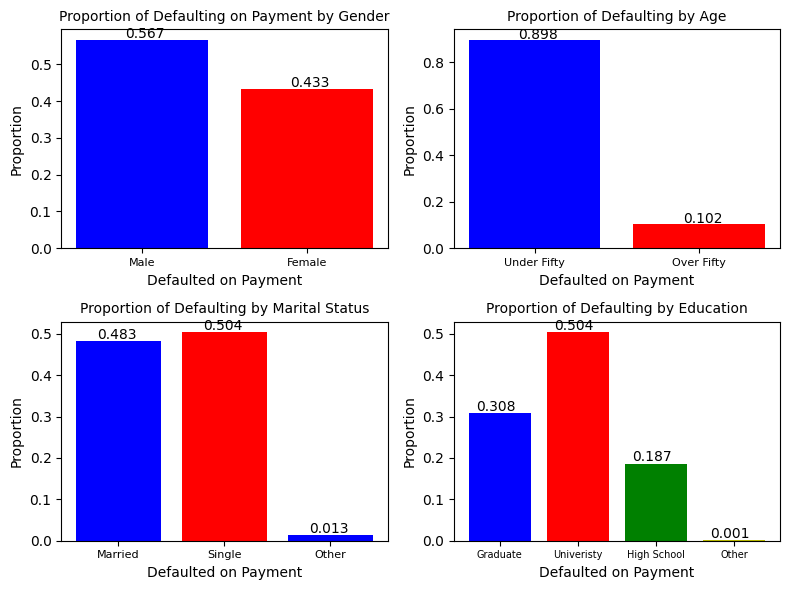

In [98]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(8, 6) )


female_prop = prop(clean_df, female_idx)
male_prop = prop(clean_df, male_idx)
bars = ax0.bar( ["Male", "Female"], [female_prop, male_prop],  color=['b','r'],)
ax0.set_xlabel('Defaulted on Payment')
ax0.set_xticks([0,1], ('Male', 'Female'), fontsize=8)
ax0.set_ylabel('Proportion')
ax0.set_title('Proportion of Defaulting on Payment by Gender')
ax0.title.set_size(10)
for bar in bars:
    yval = bar.get_height()
    ax0.text(bar.get_x()+0.3, yval + .005, round(yval,3))

under_fifty_prop = prop(clean_df, under_fifty_idx)
over_fifty_prop = prop(clean_df, over_fifty_idx)
bars = ax1.bar( ["Under Fifty", "Over Fifty"], [under_fifty_prop, over_fifty_prop],  color=['b','r'])
ax1.set_xlabel('Defaulted on Payment')
ax1.set_xticks([0, 1], ("Under Fifty", "Over Fifty"), fontsize=8)
ax1.set_ylabel('Proportion')
ax1.set_title('Proportion of Defaulting by Age')
ax1.title.set_size(10)
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x()+0.3, yval + .005, round(yval,3))
             
married_prop = prop(clean_df, married_idx)
single_prop = prop(clean_df, single_idx)
others_prop = prop(clean_df, marriage_other_idx)

bars = ax2.bar( ["Married", "Single", "Other"], [married_prop, single_prop, others_prop],  color=['b','r','b'])
ax2.set_xlabel('Defaulted on Payment')
ax2.set_xticks([0, 1,2], ('Married', 'Single','Other'), fontsize=8)
ax2.set_ylabel('Proportion')
ax2.set_title('Proportion of Defaulting by Marital Status')
ax2.title.set_size(10)
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x()+.2, yval + .005, round(yval,3))
graduate_prop= prop(clean_df, graduate_idx)
university_prop = prop(clean_df, university_idx)
highschool_prop = prop(clean_df, highschool_idx)
others_prop= prop(clean_df, other_education_idx)


bars = ax3.bar( ["Graduate", "University","High School", "Other"], [graduate_prop, university_prop, highschool_prop, others_prop],  color=['b','r','g','y'])
ax3.set_xlabel('Defaulted on Payment')
ax3.set_xticks([0, 1,2,3], ("Graduate", "Univeristy","High School", "Other"), fontsize=7)
ax3.set_ylabel('Proportion')
ax3.set_title('Proportion of Defaulting by Education')
ax3.title.set_size(10)
for bar in bars:
    yval = bar.get_height()
    ax3.text(bar.get_x()+0.1, yval + .005, round(yval,3))

fig.tight_layout()
plt.show()

In [99]:
# Split the dataset for training and testing

df = clean_df
# Obtain our X and Y values
Y = df['default payment next month']
X = df.drop('default payment next month', axis=1)

# Including all features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,)

# Don't evaluate on sensitive features
protected_cols = ['graduate_education','university_education','highschool_education', 'other_education','married','single','marriage_other','sex_male','sex_female', 'AGE']
X_train1 = X_train.copy().drop(protected_cols, axis = 1)
X_test1 = X_test.copy().drop(protected_cols, axis = 1)
y_train1 = y_train
y_test1 = y_test

# female_idx_train, male_idx_train, graduate_idx_train, university_idx_train, highschool_idx_train, other_education_idx_train, married_idx_train, single_idx_train, marriage_other_idx_train, under_fifty_idx_train, over_fifty_idx_train = get_group_idx(X_train)
female_idx_test, male_idx_test, graduate_idx_test, university_idx_test, highschool_idx_test, other_education_idx_test, married_idx_test, single_idx_test, marriage_other_idx_test, under_fifty_idx_test, over_fifty_idx_test = get_group_idx(X_test)

# Get Summary Stats
train_len = len(X_train)
test_len= len(X_test)
full_len = len(X)

def get_percents(idx_tuple, total_len):
  percents = []
  for idx in idx_tuple:
    p = len(idx)/total_len
    percents.append('%.4f'%(p)+"%")
  return percents

train_group_idx = get_group_idx(X_train)
train_stats = [train_len] + get_percents(train_group_idx, train_len)

test_group_idx = get_group_idx(X_test)
test_stats = [test_len] + get_percents(test_group_idx, test_len)

full_group_idx = get_group_idx(X)
full_stats = [full_len] + get_percents(full_group_idx, len(X))

print("Training/Testing Data Summary Statistics")
summary_stats = {
    'Staistic': ['No. Datapoints', 'Female','Male', 'Graduate Education', "University Education", "High School Education", "Other Education", "Married", "Single", "Other Relationship", "Under 50", "Over 50"],
    'Full Dataset': full_stats,
    'Training': train_stats,
    'Testing': test_stats,
}
summary_stats_df = pd.DataFrame(data=summary_stats)

display(summary_stats_df)

Training/Testing Data Summary Statistics


,Staistic,Full Dataset,Training,Testing
0,No. Datapoints,29601,22200,7401
1,Female,0.6032%,0.6005%,0.6113%
2,Male,0.3968%,0.3995%,0.3887%
3,Graduate Education,0.3575%,0.3591%,0.3525%
4,University Education,0.4738%,0.4726%,0.4774%
5,High School Education,0.1646%,0.1641%,0.1663%
6,Other Education,0.0042%,0.0043%,0.0038%
7,Married,0.4553%,0.4569%,0.4503%
8,Single,0.5340%,0.5326%,0.5380%
9,Other Relationship,0.0107%,0.0105%,0.0116%


**Explanation fo Table Above** 

The table above presents the summary statistics for training and testing datset in comparision to the summary statistics for the full dataset identified above. This was created to ensure/show that our train/test splits maintain the same demographic diversity as the datset as a whole.

#### **Modeling**

In [100]:
threshold = 0.5
results_all = pd.DataFrame(X_test)
results_all["Ground Truth"] =  y_test
results_no_sensitive = pd.DataFrame(X_test1)
results_no_sensitive["Ground Truth"] =  y_test1

# All Data
logreg = LogisticRegression(penalty=None, max_iter = 1000).fit(X_train,y_train)
probs = logreg.predict_proba(X_test)[:,1]
results_all['Logistic Regression All Vars Prob'] = probs
logreg_preds = (probs > threshold).astype(int)
results_all['Logistic Regression All Vars Pred'] = logreg_preds
print("The accuracy score for LogReg using all features is:", accuracy_score(logreg_preds, y_test))

rf = RandomForestClassifier(n_estimators=100,)
rf.fit(X_train, y_train)
probs = rf.predict_proba(X_test)[:,1]
results_all['RF All Vars Prob'] = probs
rf_preds = (probs > threshold).astype(int)
results_all['RF All Vars Pred'] = rf_preds

print("The accuracy score for a Random Forest Classifier using all features is:", accuracy_score(rf_preds, np.array(y_test)))


# No sensitive features
logreg1 = LogisticRegression(penalty=None,max_iter = 1000).fit(X_train1,y_train1)
probs = logreg1.predict_proba(X_test1)[:,1]
results_no_sensitive['Logistic Regression No Sensitive Vars Prob'] = probs
logreg1_preds = (probs > threshold).astype(int)
results_no_sensitive['Logistic Regression No Sensitive Vars Pred'] = logreg1_preds
print("The accuracy score for LogReg excluding sensitive features is:", accuracy_score(logreg1_preds, y_test1))

rf1 = RandomForestClassifier(n_estimators=100,)
rf1.fit(X_train1, y_train1)
probs = rf1.predict_proba(X_test1)[:, 1]
results_no_sensitive['RF No Sensitive Vars Prob'] = probs
rf1_preds = (probs > threshold).astype(int)
print("The accuracy score for a Random Forest Classifier excluding sensitive features is:", accuracy_score(rf1_preds, y_test1))
results_no_sensitive['RF No Sensitive Vars Pred'] = rf1_preds
#display(results_all.head())
#display(results_no_sensitive.head())

The accuracy score for LogReg using all features is: 0.7761113363059046
The accuracy score for a Random Forest Classifier using all features is: 0.8166463991352519
The accuracy score for LogReg excluding sensitive features is: 0.7759762194298068
The accuracy score for a Random Forest Classifier excluding sensitive features is: 0.8155654641264694


In [101]:
def confusion_matrix_metrics(y_test, predicted_labels, category):
  tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted_labels).ravel()
  fp_rate = fp/(fp+tn)
  fn_rate = fn/(fn+tp)
  frac_positive = (fp+tp)/(fn+fp+tn+tp)
  print("\tFalse Positive Rate for "+category+":", '%.4f'%(fp_rate))
  print("\tFalse Negative Rate for "+category+":", '%.4f'%(fn_rate))
  print("\tFraction of "+category+" classified positive:", '%.4f'%(frac_positive))

In [102]:
# Fairness Metrics 
print ("\n We now examine how the models performs overall and by subgroup. For this part of Phase 2 we will focus on how the results vary by SEX")
print ("\n In later phases of our project we hope to explore metrics for other sensitive attributes as well and combinations of attributes")

female_idx = female_idx_test
male_idx = male_idx_test

print("\n Using the Logistic Regression classifier with all features:")
predicted_labels = results_all['Logistic Regression All Vars Pred']

confusion_matrix_metrics(y_test, predicted_labels, "everyone")
confusion_matrix_metrics(y_test[female_idx], predicted_labels[female_idx], "females")
confusion_matrix_metrics(y_test[male_idx], predicted_labels[male_idx], "males")
print("\n")

print("\n Using the Random Forest classifier with all features:")
predicted_labels = results_all['RF All Vars Pred']


confusion_matrix_metrics(y_test, predicted_labels, "everyone")
confusion_matrix_metrics(y_test[female_idx], predicted_labels[female_idx], "females")
confusion_matrix_metrics(y_test[male_idx], predicted_labels[male_idx], "males")
print("\n")

print("\n Using the Logistic Regression classifier without sensitive features:")
predicted_labels = results_no_sensitive['Logistic Regression No Sensitive Vars Pred']

confusion_matrix_metrics(y_test1, predicted_labels, "everyone")
confusion_matrix_metrics(y_test1[female_idx], predicted_labels[female_idx], "females")
confusion_matrix_metrics(y_test1[male_idx], predicted_labels[male_idx], "males")
print("\n")


print("\n Using the Random Forest classifier without sensitive features:")
predicted_labels = results_no_sensitive['RF No Sensitive Vars Pred']

confusion_matrix_metrics(y_test1, predicted_labels, "everyone")
confusion_matrix_metrics(y_test1[female_idx], predicted_labels[female_idx], "females")
confusion_matrix_metrics(y_test1[male_idx], predicted_labels[male_idx], "males")
print("\n")


 We now examine how the models performs overall and by subgroup. For this part of Phase 2 we will focus on how the results vary by SEX

 In later phases of our project we hope to explore metrics for other sensitive attributes as well and combinations of attributes

 Using the Logistic Regression classifier with all features:
	False Positive Rate for everyone: 0.0002
	False Negative Rate for everyone: 1.0000
	Fraction of everyone classified positive: 0.0001
	False Positive Rate for females: 0.0003
	False Negative Rate for females: 1.0000
	Fraction of females classified positive: 0.0002
	False Positive Rate for males: 0.0000
	False Negative Rate for males: 1.0000
	Fraction of males classified positive: 0.0000



 Using the Random Forest classifier with all features:
	False Positive Rate for everyone: 0.0550
	False Negative Rate for everyone: 0.6286
	Fraction of everyone classified positive: 0.1258
	False Positive Rate for females: 0.0510
	False Negative Rate for females: 0.6338
	Fractio

#### Part 4(c)

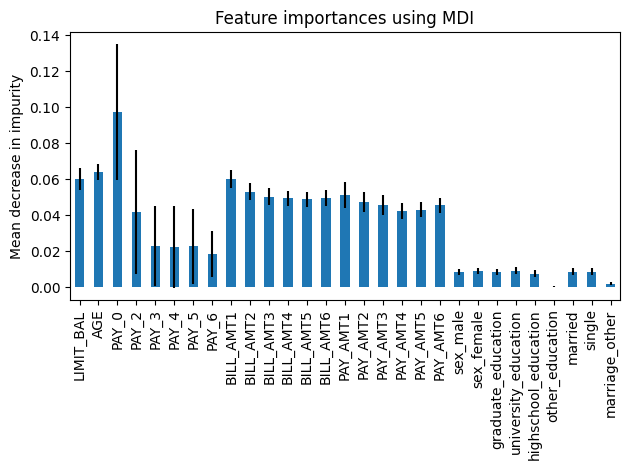

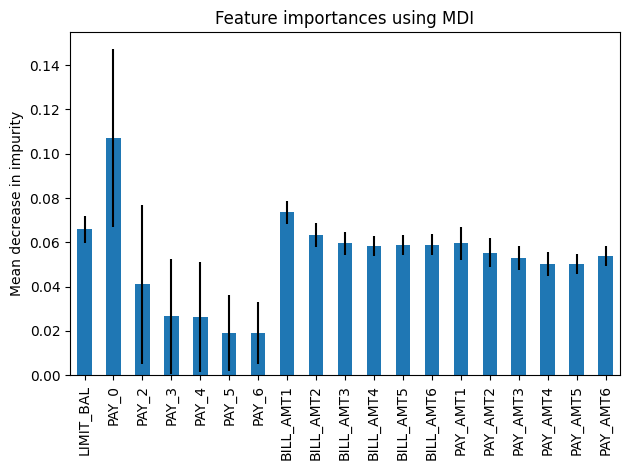

In [103]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'sex_male', 'sex_female',
       'graduate_education', 'university_education', 'highschool_education',
       'other_education', 'married', 'single', 'marriage_other'])

fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

importances = rf1.feature_importances_
forest_importances = pd.Series(importances, index=['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in rf1.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

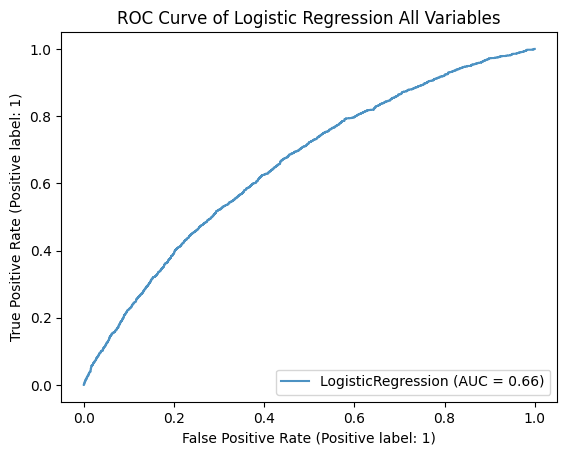

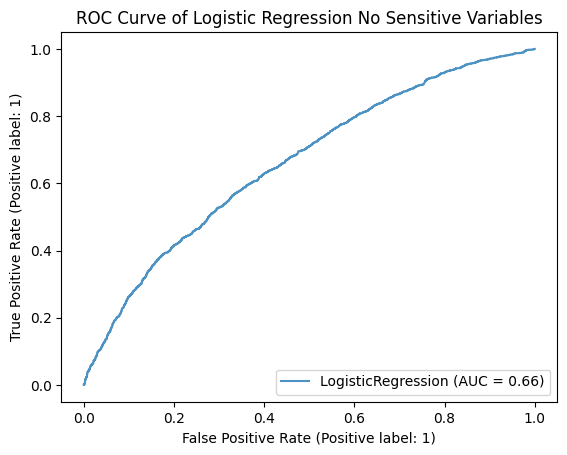

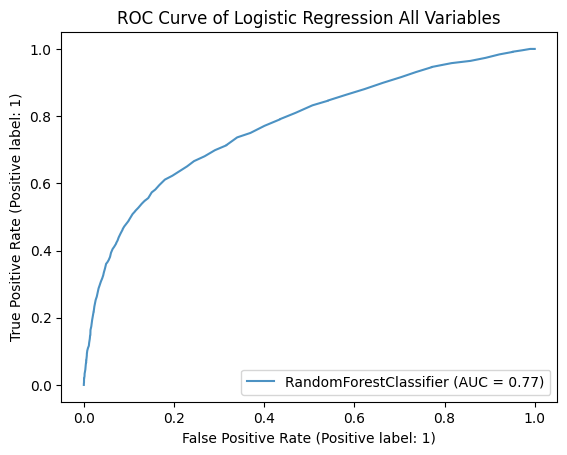

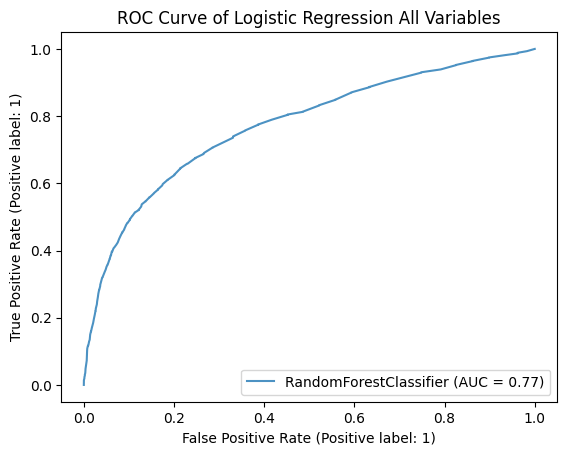

In [104]:
# AUC
logreg_auc = roc_auc_score(y_test, logreg_preds)
logreg1_auc = roc_auc_score(y_test1, logreg1_preds)
rf_auc = roc_auc_score(y_test, rf_preds)
rf1_auc = roc_auc_score(y_test1, rf1_preds)

ax = plt.gca()
logreg_disp = RocCurveDisplay.from_estimator(logreg, X_test, y_test, ax=ax, alpha=0.8)
ax.set_title('ROC Curve of Logistic Regression All Variables')
plt.show()
ax = plt.gca()
logreg1_disp = RocCurveDisplay.from_estimator(logreg1, X_test1, y_test1, ax=ax, alpha=0.8)
ax.set_title('ROC Curve of Logistic Regression No Sensitive Variables')
plt.show()
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, alpha=0.8)
ax.set_title('ROC Curve of Logistic Regression All Variables')
plt.show()
ax = plt.gca()
rf1_disp = RocCurveDisplay.from_estimator(rf1, X_test1, y_test1, ax=ax, alpha=0.8)
ax.set_title('ROC Curve of Logistic Regression All Variables')
plt.show()

#### **Results**


Overall, our predictions seem “reasonable,” with the random forest models each classifying 11 to 12% of females, and 13 to 14% of females overall as defaulting. 

Logistic Regression: The logistic regression model exhibits a slightly higher tendency to correctly classify non-defaulting instances for females while demonstrating slightly better performance in identifying defaulting instances for males, suggesting some level of SEX-related differences.  The false negative rate overall is quite high at 82.78%, being slightly higher for female clients compared to men. This could be due to the fact that the data is imbalanced between males and females and between those that default versus those that do not. This is considered to be unreasonable. In conclusion, this does not seem like the best model to use in this scenario due to the fact that the false negative rate is problematically high.

RF: The Random Forest models tended to provide probabilities that were closer to 0 or to 1 rather than one in the middle compared to Logistic Regression. This suggests that the Random Forest model was more confident in its predictions.

One interesting note is that out of all of the sensitive variables the Random Forest trained on all the features cared a lot about the AGE feature. Going forward we would like to do more analysis on how the false negatives and false positive rates differ by different age categories. Also, currently, we use two categories for age: <50, >=50. It would be interesting to do analysis on more granular age groups such as by decade. 

ii. One hypothesis for why our model did not perform well in certain instances is that we do not have a lot of data points where the person defaulted in actuality. Our analysis shows that the dataset has 6605 people who defaulted and 22,996 who did not.

iii.  We notice that though each model performed fairly well in terms of prediction accuracy, they all had extremely high rates of false negatives. We hypothesize that this is because the metric by which we train the models is simply with accuracy, meaning our model is simply trying to optimize accuracy. We plan on combating this for the final project by diversifying the training metrics to include fairness notions along with simply “accuracy.”

#### **Contributions**

* Overall: We worked as a team for this assignment, frequently working together to execute each of the desired sections. Thus each group member has touched many parts of the project.
* Tanvi: For the Rotterdam analysis, I contributed by cleaning the data and finding some of the summary statistics. Once we pivoted, I contributed by creating the one-hot-encodings, identifying rows that had bad data values, adding subgroup summary statistics, and finding the false positive and false negative rates. 
* Ella: Ella contributed by writing the code for training the models, and getting their predictions. As well as all of part 4(c)
* Dylan: Dylan contributed by writing Part 3 and also by helpinge extract the weights of the features the random forest model looks at. She also helped analyze the results of the model in the conclusion.
* Maddy: Maddy contributed by writing code to help clean the datset, extract summary statistics, and created the graphs in 2c. She also helped analyze the results in the conclusion.

#### **Sources Cited**

[1]I-Cheng Yeh. 2016. Default of credit card clients. UCI Machine Learning Repository. DOI:https://doi.org/https://doi.org/10.24432/C55S3H

[2] Scikit-learn developers. Feature importances with a forest of trees. 2007-2024. Retrieved March 15, 2024, from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html